# 2차원데이터

In [1]:
import numpy as np
import pandas as pd
import math
from scipy.stats import *
import scipy as sp

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3
# Dataframe의 출력을 소수점 이하 3자리로 제한
pd.set_option('precision', 3)

In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [4]:
import numpy as np
# numpy float 출력옵션 변경
# np.set_printoptions(precision=3)
# np.set_printoptions(precision=20, suppress=True)
# pd.options.display.float_format = '{:.2f}'.format
np.set_printoptions(formatter={'float_kind': lambda x: "{0:0.3f}".format(x)})

In [5]:
df = pd.read_csv('./data/ch2_scores_em.csv',
                 index_col='student number')
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


Text(0.5, 0, 'english score')

Text(0, 0.5, 'mathematics score')

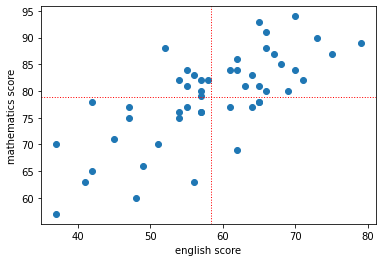

In [6]:
plt.scatter(df['english'], df['mathematics'])
plt.xlabel('english score')
plt.ylabel('mathematics score')

plt.axhline(y=df['mathematics'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.axvline(x=df['english'].mean(), color='r',
            linewidth=1,linestyle=':')
plt.show()

## 공분산

교재 74p

In [7]:
summary_df = df.copy()
summary_df['eng_dev.'] =\
    summary_df['english'] - summary_df['english'].mean()
summary_df['math_dev.'] =\
    summary_df['mathematics'] - summary_df['mathematics'].mean()
summary_df['productOfDev.'] =\
    summary_df['eng_dev.'] * summary_df['math_dev.']
summary_df.head()

,english,mathematics,eng_dev.,math_dev.,productOfDev.
student number,,,,,
1,42,65,-16.38,-13.88,227.354
2,69,80,10.62,1.12,11.894
3,56,63,-2.38,-15.88,37.794
4,41,63,-17.38,-15.88,275.994
5,57,76,-1.38,-2.88,3.974


In [8]:
summary_df['productOfDev.'].mean()

58.486

numpy의 공분산 함수 : cov(data1, data2, ddof=)

In [9]:
cov_mat = np.cov(df['english'],df['mathematics'], ddof=0)
cov_mat

array([[94.116, 58.486],
       [58.486, 69.386]])

In [10]:
cov_mat[0, 1], cov_mat[1, 0]

(58.4856, 58.4856)

각 과목의 분산

In [11]:
# 영어 과목의 분산
cov_mat[0, 0]

94.11560000000001

In [12]:
# 수학 과목의 분산
cov_mat[1, 1]

69.38559999999995

In [14]:
np.var(df['english'], ddof=0), np.var(df['mathematics'], ddof=0)

(94.116, 69.386)

## 상관계수

In [15]:
# 수식으로 상관계수 계산
np.cov(df['english'], df['mathematics'], ddof=0)[0, 1] /\
    (np.std(df['english']) * np.std(df['mathematics']))

0.7237414863069244

In [16]:
np.corrcoef(df['english'], df['mathematics'])

array([[1.000, 0.724],
       [0.724, 1.000]])

In [18]:
df.corr()

,english,mathematics
english,1.000,0.724
mathematics,0.724,1.000


Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

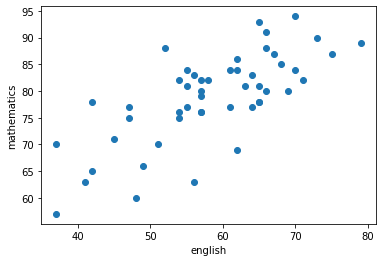

In [19]:
# 산점도
plt.scatter(df['english'],df['mathematics'] )
plt.xlabel('english')
plt.ylabel('mathematics')
plt.show()

## 회귀 직선

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

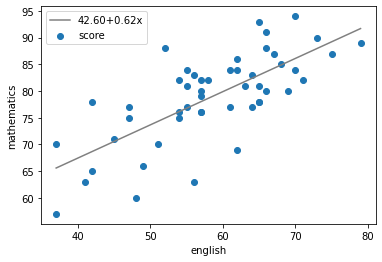

In [20]:
# 계수β_0와β_1를 구한다(기울기와 절편)
poly_fit = np.polyfit(df['english'],df['mathematics'], 1)

# β_0+β_1 x를 반환하는 함수를 작성
poly_1d = np.poly1d(poly_fit)

# 직선을 그리기 위한 x좌표
xs = np.linspace(df['english'].min(), df['english'].max())

# xs에 대응하는 y좌표
ys = poly_1d(xs)

plt.xlabel('english')
plt.ylabel('mathematics')
plt.scatter(df['english'],df['mathematics'], label='score')
plt.plot(xs, ys, color='gray',
        label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')

# 범례의 표시
plt.legend(loc='upper left')

plt.show()

## 히트맵

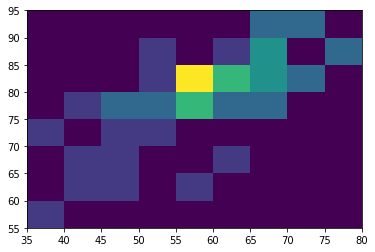

In [24]:
c = plt.hist2d(df['english'], df['mathematics'], bins=[9,8], range=[(35,80),(55,95)])

Text(0.5, 0, 'english')

Text(0, 0.5, 'mathematics')

([<matplotlib.axis.XTick at 0x1325ff0db50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

([<matplotlib.axis.YTick at 0x1325ff1c970>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

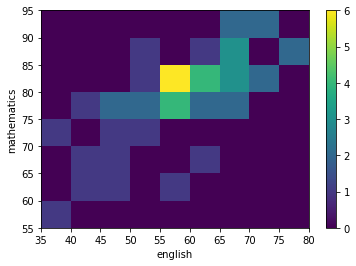

In [29]:
c = plt.hist2d(df['english'], df['mathematics'],
          bins=(9,8), range=[(35,80),(55,95)])
c[3]
plt.xlabel('english')
plt.ylabel('mathematics')
plt.xticks(c[1])
plt.yticks(c[2])

plt.colorbar(c[3])
plt.show()

# 확률과 확률분포

In [30]:
df = pd.read_csv('./data/ch4_scores400.csv')
scores = df['score']
scores[:10]


0    76
1    55
2    80
3    80
4    74
5    61
6    81
7    76
8    23
9    80
Name: score, dtype: int64

In [32]:
np.random.choice([1,2,3],3)

array([1, 1, 2])

In [33]:
np.random.choice([1,2,3],3, replace=False)

array([3, 2, 1])

In [34]:
np.random.seed(123)
np.random.choice([1,2,3],3)

array([3, 2, 3])

In [37]:
np.random.seed(0)
sample = np.random.choice(scores, 20)
sample.mean()

70.4

In [38]:
scores.mean()

69.530

In [40]:
# seed로 지정 안하면 무작위!
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 데이터의 표본평균 {sample.mean()}')

1번째 무작위 추출로 얻은 데이터의 표본평균 72.45
2번째 무작위 추출로 얻은 데이터의 표본평균 63.7
3번째 무작위 추출로 얻은 데이터의 표본평균 66.05
4번째 무작위 추출로 얻은 데이터의 표본평균 71.7
5번째 무작위 추출로 얻은 데이터의 표본평균 74.15


In [42]:
# 불공정한 주사위의 확률분포를 구하는 실험
# 확률 변수에 필요한 변수가 취할 수 있는 값 : dice
dice = [1,2,3,4,5,6]

# 그 값이 나올 수 있는 확률 : prob
prob=[1/21,2/21,3/21,4/21,5/21,6/21]
prob

[0.048, 0.095, 0.143, 0.190, 0.238, 0.286]

In [43]:
np.random.choice(dice, p=prob)

1

In [45]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5, 3,
       4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6, 5,
       5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2, 2,
       6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2, 4,
       1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4, 6])

In [46]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
             'rel.freq':freq/num_trial},
            index=pd.Index(np.arange(1,7), name='dice'))

,frequency,rel.freq
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,26,0.26
5,19,0.19
6,28,0.28


(array([0.050, 0.090, 0.130, 0.260, 0.190, 0.280]),
 array([1.000, 2.000, 3.000, 4.000, 5.000, 6.000, 7.000]),
 <BarContainer object of 6 artists>)

[Text(1.5, 0, '1'),
 Text(2.5, 0, '2'),
 Text(3.5, 0, '3'),
 Text(4.5, 0, '4'),
 Text(5.5, 0, '5'),
 Text(6.5, 0, '6')]

Text(0.5, 0, 'dice')

Text(0, 0.5, 'relative frequency')

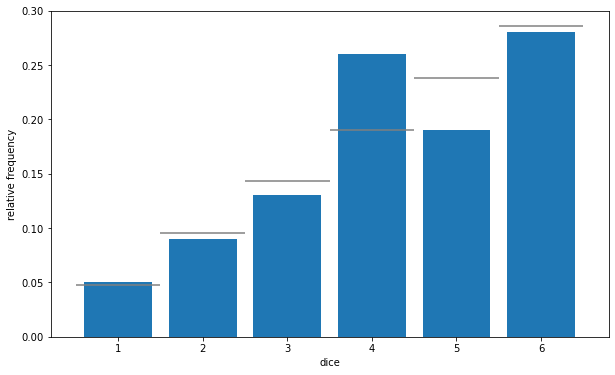

In [47]:
# 100번의 시도는 정해져 있는 확률과는 차이가 있다.

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))

# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

(array([0.050, 0.092, 0.141, 0.191, 0.243, 0.284]),
 array([1.000, 2.000, 3.000, 4.000, 5.000, 6.000, 7.000]),
 <BarContainer object of 6 artists>)

Text(0.5, 0, 'dice')

Text(0, 0.5, 'relative frequency')

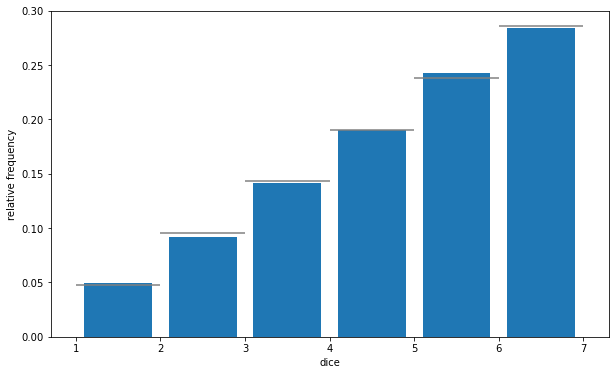

In [48]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

# ax.set_xticks(np.linspace(1.5, 6.5, 6))
# ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 추론 통계에서의 확률

(array([0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000,
        0.000, 0.000, 0.000, 0.000, 0.000, 0.003, 0.000, 0.000, 0.000,
        0.000, 0.003, 0.003, 0.000, 0.003, 0.000, 0.000, 0.003, 0.000,
        0.000, 0.000, 0.003, 0.000, 0.003, 0.005, 0.007, 0.007, 0.000,
        0.013, 0.013, 0.007, 0.005, 0.015, 0.010, 0.000, 0.022, 0.003,
        0.020, 0.025, 0.020, 0.025, 0.020, 0.013, 0.015, 0.033, 0.015,
        0.035, 0.022, 0.020, 0.015, 0.033, 0.040, 0.028, 0.025, 0.018,
        0.022, 0.020, 0.025, 0.018, 0.035, 0.025, 0.033, 0.025, 0.025,
        0.020, 0.018, 0.022, 0.007, 0.015, 0.022, 0.013, 0.005, 0.007,
        0.013, 0.020, 0.015, 0.010, 0.007, 0.000, 0.013, 0.005, 0.003,
        0.013]),
 array([0.000, 1.000, 2.000, 3.000, 4.000, 5.000, 6.000, 7.000, 8.000,
        9.000, 10.000, 11.000, 12.000, 13.000, 14.000, 15.000, 16.000,
        17.000, 18.000, 19.000, 20.000, 21.000, 22.000, 23.0

(20.000, 100.000)

(0.000, 0.042)

Text(0.5, 0, 'score')

Text(0, 0.5, 'relative frequency')

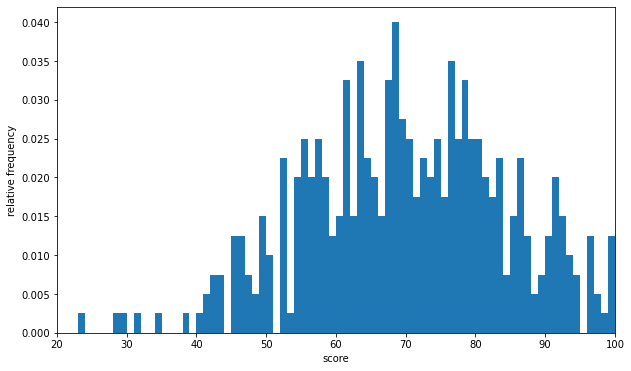

In [49]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

## 이산형/연속형 확률분포

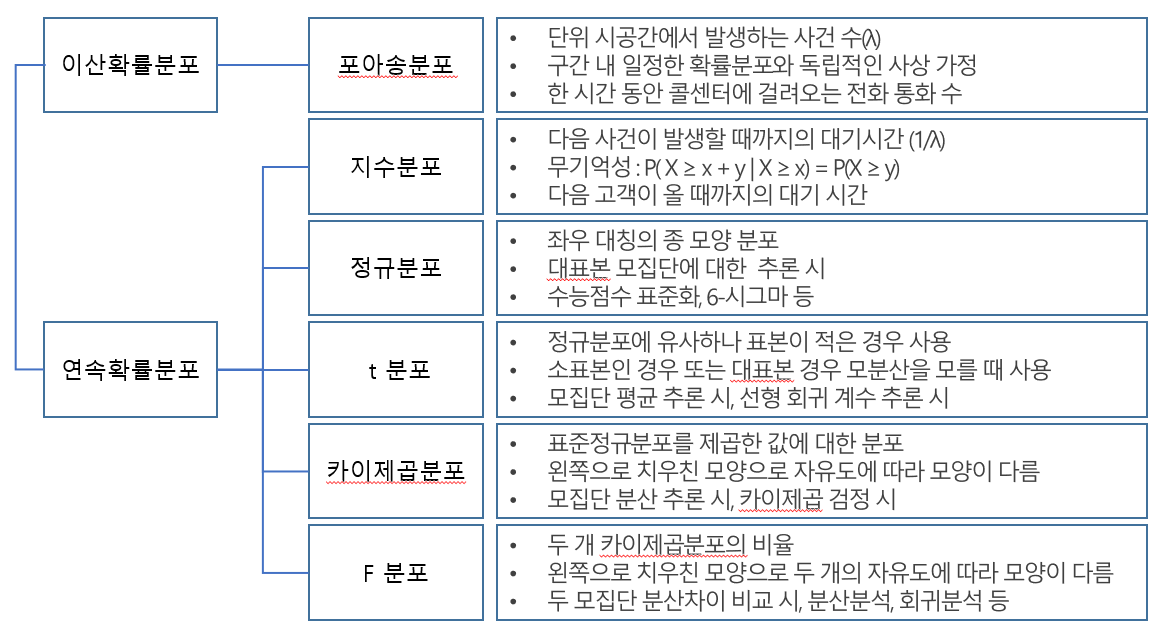